# 🚀 Gradient Boosting for Regression

## 📝 Core Concept
**Sequential ensemble method** that builds models iteratively, where each new model corrects the errors of the previous ensemble.

---

## 🎯 Algorithm Overview

### **Step 1: Initialize**
$$F_0(x) = \arg\min_\gamma \sum_{i=1}^n L(y_i, \gamma)$$

For squared loss: $F_0(x) = \bar{y}$ (mean of target values)

### **Step 2: Iterative Boosting** (for $m = 1, 2, ..., M$)

**2a. Compute Residuals (Negative Gradients)**
$$r_{im} = -\left[\frac{\partial L(y_i, F(x_i))}{\partial F(x_i)}\right]_{F=F_{m-1}}$$

For squared loss: $r_{im} = y_i - F_{m-1}(x_i)$

**2b. Fit Base Learner**
$$h_m(x) = \text{fit}(\{(x_i, r_{im})\}_{i=1}^n)$$

**2c. Find Optimal Step Size**
$$\gamma_m = \arg\min_\gamma \sum_{i=1}^n L(y_i, F_{m-1}(x_i) + \gamma h_m(x_i))$$

**2d. Update Model**
$$F_m(x) = F_{m-1}(x) + \gamma_m h_m(x)$$

### **Step 3: Final Prediction**
$$F(x) = F_0(x) + \sum_{m=1}^M \gamma_m h_m(x)$$

---

## 📊 Key Loss Functions

| **Loss Function** | **Formula** | **Gradient** |
|------------------|-------------|--------------|
| **Squared Loss** | $L = \frac{1}{2}(y - F)^2$ | $r = y - F$ |
| **Absolute Loss** | $L = \|y - F\|$ | $r = \text{sign}(y - F)$ |
| **Huber Loss** | $L = \begin{cases} \frac{1}{2}(y-F)^2 & \text{if } \|y-F\| \leq \delta \\ \delta\|y-F\| - \frac{1}{2}\delta^2 & \text{otherwise} \end{cases}$ | $r = \begin{cases} y-F & \text{if } \|y-F\| \leq \delta \\ \delta \cdot \text{sign}(y-F) & \text{otherwise} \end{cases}$ |

---

## ⚙️ Regularization & Control

### **Learning Rate (Shrinkage)**
$$F_m(x) = F_{m-1}(x) + \nu \cdot \gamma_m h_m(x)$$
where $\nu \in (0, 1]$ controls the contribution of each tree.

### **Subsampling**
- **Stochastic GB**: Random sample of training data for each iteration
- **Feature subsampling**: Random subset of features per split

---

## 🎯 Hyperparameters

- **`n_estimators`**: Number of boosting stages $M$
- **`learning_rate`**: Shrinkage parameter $\nu$
- **`max_depth`**: Maximum depth of base learners
- **`min_samples_split`**: Minimum samples required to split
- **`subsample`**: Fraction of samples for stochastic boosting

---

## ✨ Key Advantages
- **High predictive accuracy** for structured data
- **Feature importance** through gain calculations
- **Handles missing values** naturally
- **No need for feature scaling**

## ⚠️ Considerations
- **Prone to overfitting** without proper regularization
- **Sequential training** (not parallelizable)
- **Sensitive to outliers** (depending on loss function)

# 🏗️ Additive Modeling in Boosting

## 📝 Core Concept
**Additive models** express the target function as a sum of simpler functions, enabling sequential learning where each component focuses on specific patterns.

---

## 🎯 Additive Model Framework

### **General Form**
$$F(x) = \sum_{m=0}^M f_m(x)$$

where:
- $f_0(x)$ = initial prediction (base model)
- $f_m(x)$ = $m$-th component function
- Each $f_m$ captures different aspects of the data

### **In Boosting Context**
$$F_M(x) = f_0(x) + \sum_{m=1}^M \beta_m h_m(x)$$

where:
- $f_0(x)$ = constant initial model
- $h_m(x)$ = weak learner at stage $m$
- $\beta_m$ = coefficient/weight for $m$-th learner

---

## 🔄 Forward Stagewise Additive Modeling

### **Objective**
At each stage $m$, solve:
$$(\beta_m, h_m) = \arg\min_{\beta, h} \sum_{i=1}^n L(y_i, F_{m-1}(x_i) + \beta h(x_i))$$

### **Sequential Updates**
$$F_m(x) = F_{m-1}(x) + \beta_m h_m(x)$$

**Key Property**: Once $\beta_j, h_j$ are determined for $j < m$, they remain **fixed**.

---

## 📊 Additive vs Non-Additive Models

| **Aspect** | **Additive** | **Non-Additive** |
|------------|--------------|-------------------|
| **Form** | $F(x) = \sum f_m(x)$ | $F(x) = g(f_1(x), f_2(x), ...)$ |
| **Interpretation** | Each $f_m$ contributes independently | Complex interactions between components |
| **Training** | Sequential, greedy optimization | Joint optimization required |
| **Complexity** | Linear in number of components | Exponential in interactions |

---

## 🎯 Component Functions in Different Algorithms

### **AdaBoost**
$$F_M(x) = \text{sign}\left(\sum_{m=1}^M \alpha_m h_m(x)\right)$$
- $h_m(x) \in \{-1, +1\}$ (classification stumps)
- $\alpha_m = \frac{1}{2}\log\frac{1-\epsilon_m}{\epsilon_m}$ (error-based weights)

### **Gradient Boosting**
$$F_M(x) = F_0(x) + \sum_{m=1}^M \gamma_m h_m(x)$$
- $h_m(x)$ fits pseudo-residuals: $r_{im} = -\frac{\partial L}{\partial F}$
- $\gamma_m$ optimized via line search

### **XGBoost/LightGBM**
$$F_M(x) = \sum_{m=1}^M f_m(x) \quad \text{where } f_m \in \mathcal{F}$$
- $\mathcal{F}$ = space of regression trees
- Regularized objective with tree complexity penalty

---

## 🧮 Mathematical Properties

### **Linearity of Predictions**
$$\mathbb{E}[F(x)] = \mathbb{E}\left[\sum_{m=0}^M f_m(x)\right] = \sum_{m=0}^M \mathbb{E}[f_m(x)]$$

### **Bias-Variance Decomposition**
$$\text{Bias}^2[F] = \left(\sum_{m=0}^M \text{Bias}[f_m]\right)^2$$
$$\text{Var}[F] = \sum_{m=0}^M \text{Var}[f_m] + 2\sum_{i<j}\text{Cov}[f_i, f_j]$$

### **Function Space Perspective**
Additive modeling explores the space:
$$\mathcal{H} = \left\{F : F(x) = \sum_{m=0}^M \beta_m h_m(x), h_m \in \mathcal{H}_{\text{base}}\right\}$$

---

## ⚡ Advantages of Additive Structure

### **🎯 Interpretability**
- Each component $f_m(x)$ has clear contribution
- **Partial dependence**: $\frac{\partial F}{\partial x_j} = \sum_m \frac{\partial f_m}{\partial x_j}$

### **🔧 Modularity**
- Components can be different types (trees, linear, splines)
- Easy to add domain-specific constraints

### **📈 Incremental Learning**
- Models can be updated by adding new components
- No need to retrain entire ensemble

### **🎛️ Regularization Control**
$$F_M(x) = \sum_{m=0}^M \lambda_m f_m(x)$$
Individual component weights $\lambda_m$ can be tuned independently.

---

## 🔍 Relationship to Statistical Models

### **Generalized Additive Models (GAMs)**
$$g(\mu) = \beta_0 + \sum_{j=1}^p f_j(x_j)$$
- Smooth functions $f_j$ of individual features
- Boosting can approximate GAM structure

### **Functional ANOVA Decomposition**
$$F(x) = \mu + \sum_j f_j(x_j) + \sum_{j<k} f_{jk}(x_j, x_k) + ...$$
- Boosting naturally captures main effects first
- Higher-order interactions added progressively

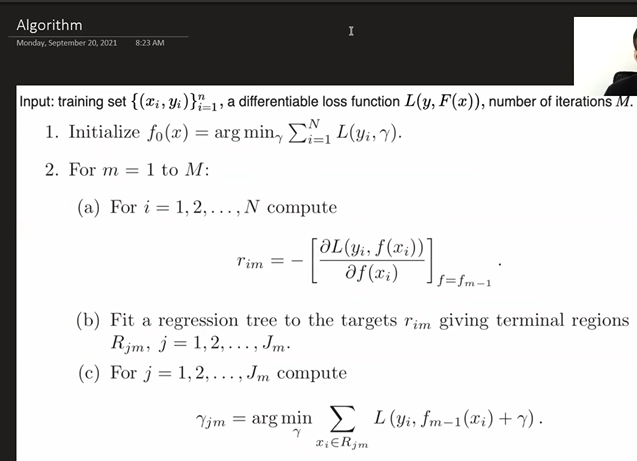

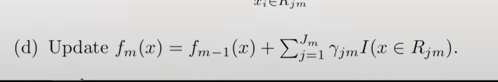

We first have inputs (x,y). We need a differentiable loss function and no. of iterations

## 🚶 Simple Explanation: Gradient Boosting for Regression

### Step 1: Start with a simple prediction
- Predict the **mean** of the target variable:
  $$
  F_0(x) = \bar{y}
  $$
- This becomes your **initial model**.

---

### Step 2: Compute residuals
- For each sample $i$, calculate the **error** (residual):
  $$
  r_i = y_i - F_{m-1}(x_i)
  $$
- Residual = "what's left" that the model didn’t learn yet.

---

### Step 3: Train a tree on residuals
- Fit a **small regression tree** (a weak learner) to predict the residuals.
- This tree learns how to fix the model’s mistakes.

---

### Step 4: Scale the tree's output
- Multiply the tree’s predictions by a **learning rate** $\eta$ (e.g., 0.1) to control updates.
- Also multiply by $\gamma_m$ (optional step size).

---

### Step 5: Update the model
- Add the scaled predictions to the previous model:
  $$
  F_m(x) = F_{m-1}(x) + \eta \cdot \gamma_m \cdot h_m(x)
  $$
- Now the model is slightly better!

---

### Step 6: Repeat
- Go back to Step 2 and repeat for $M$ rounds.
- Each round adds a new tree to correct errors made by the current ensemble.

---


### What is a terminal region?

It comes from the working of the decision tree. It is the region that is not split by the decision tree (basically, the end regions after splitting)

But we don't simply use the decision tree output. We take the rows which belong to the terminal region (output) of the decision trees and get the min gamma such that the sum of the loss functions with yi and f_m-1(x_i) + gamma is min. We get it using differentiation

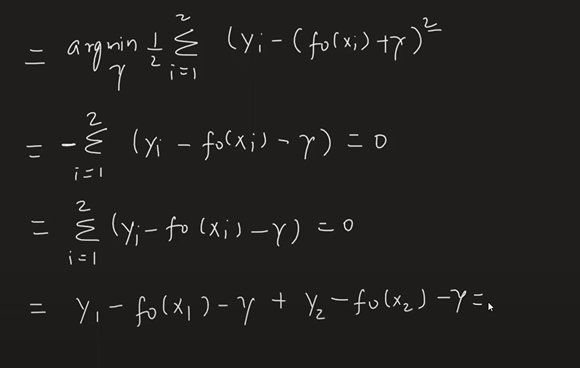

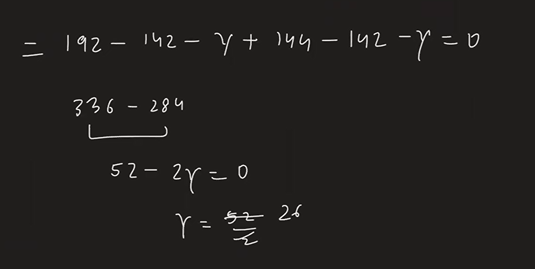

As we used MSE we get the same values as the leaves of the decision trees but if we choose any other loss functionn we will get a different answer